In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

----------

In [2]:
def init(dimensions):
    
    parametres = {}
    C = len(dimensions)


    for c in range(1, C):
        parametres['W' + str(c)] = np.random.randn(dimensions[c], dimensions[c - 1])
        parametres['b' + str(c)] = np.random.randn(dimensions[c], 1)

    return parametres

In [32]:
def forward_propagation(X, parametres):
  
    activations = {'A0': X}

    C = len(parametres) // 2

    for c in range(1, C + 1):

        Z = parametres['W' + str(c)].dot(activations['A' + str(c - 1)]) + parametres['b' + str(c)]
        print(Z)
        activations['A' + str(c)] = 1 / (1 + np.exp(-Z))

    return activations

In [34]:
def back_propagation(y, parametres, activations):

    m = y.shape[1]
    C = len(parametres) // 2


    dZ = activations['A' + str(C)] - y
    gradients = {}

    for c in reversed(range(1, C + 1)):
        gradients['dW' + str(c)] = 1/m * np.dot(dZ, activations['A' + str(c - 1)].T)
        gradients['db' + str(c)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
        if c > 1:
            dZ = np.dot(parametres['W' + str(c)].T, dZ) * activations['A' + str(c - 1)] * (1 - activations['A' + str(c - 1)])

    return gradients

In [5]:
def update(gradients, parametres, learning_rate):

    C = len(parametres) // 2

    for c in range(1, C + 1):
        parametres['W' + str(c)] = parametres['W' + str(c)] - learning_rate * gradients['dW' + str(c)]
        parametres['b' + str(c)] = parametres['b' + str(c)] - learning_rate * gradients['db' + str(c)]

    return parametres

In [6]:
def predict(X, parametres):
    activations = forward_propagation(X, parametres)
    C = len(parametres) // 2
    Af = activations['A' + str(C)]
    return Af >= 0.5

In [7]:
def deep_neural_network(X_train, y_train, X_test, y_test, hidden_layers = [16, 16, 16], learning_rate = 0.001, n_iter = 3000):
    
    dimensions = hidden_layers
    dimensions.insert(0, X_train.shape[0])
    dimensions.append(y_train.shape[0])

    parametres = init(dimensions)
    

    training_history = np.zeros((int(n_iter), 2))
    
    testing_history = np.zeros((int(n_iter), 2))


    C = len(parametres) // 2

    for i in tqdm(range(n_iter)):

        activations = forward_propagation(X_train, parametres)
        gradients = back_propagation(y_train, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)
        Af = activations['A' + str(C)]
        
        training_history[i, 0] = (log_loss(y_train.flatten(), Af.flatten()))
        y_pred = predict(X_train, parametres)
        training_history[i, 1] = (accuracy_score(y_train.flatten(), y_pred.flatten()))
        
        activations_test = forward_propagation(X_test, parametres)
        Af_test = activations_test['A' + str(C)]
        testing_history[i, 0] = (log_loss(y_test.flatten(), Af_test.flatten()))
        y_pred = predict(X_test, parametres)
        testing_history[i, 1] = (accuracy_score(y_test.flatten(), y_pred.flatten()))

    plt.figure(figsize=(12, 4))
    plt.subplot(2, 2, 1)
    plt.plot(training_history[:, 0], label='train loss')
    plt.legend()
    plt.subplot(2, 2, 2)
    plt.plot(training_history[:, 1], label='train acc')
    plt.legend()
    plt.subplot(2, 2, 3)
    plt.plot(testing_history[:, 1], label='train acc')
    plt.legend()
    plt.show()

    return training_history

-----

In [34]:
df=pd.read_csv("./CVD_cleaned-Cleaned.csv",sep=";")
df

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,0,0,0,0,0,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,0,1,0,0,0,1,0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,1,0,0,0,0,1,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,1,1,0,0,0,1,0,1,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,0,0,0,0,0,0,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,1,0,0,0,0,0,0,1,1,168.0,81.65,29.05,0,4.0,30.0,8.0,0.0
308850,1,0,0,0,0,1,0,1,9,180.0,69.85,21.48,0,8.0,15.0,60.0,4.0
308851,1,0,0,0,1,1,0,0,2,157.0,61.23,24.69,1,4.0,40.0,8.0,4.0
308852,1,0,0,0,0,0,0,1,9,183.0,79.38,23.73,0,3.0,30.0,12.0,0.0


In [35]:
df.columns

Index(['Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer',
       'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category',
       'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [36]:
for i in ['Height_(cm)','Weight_(kg)','BMI','Alcohol_Consumption','Fruit_Consumption','Green_Vegetables_Consumption','FriedPotato_Consumption']:
    df[i] = (df[i] - df[i].min()) / (df[i].max() - df[i].min())     


In [37]:
df

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,0,0,0,0,0,1,0,10,0.393333,0.028761,0.028863,1,0.000000,0.250000,0.125000,0.093750
1,0,1,0,0,0,1,0,0,10,0.493333,0.194576,0.186347,0,0.000000,0.250000,0.000000,0.031250
2,1,0,0,0,0,1,0,0,8,0.480000,0.236878,0.245676,0,0.133333,0.100000,0.023438,0.125000
3,1,1,0,0,0,1,0,1,11,0.593333,0.255493,0.191387,0,0.000000,0.250000,0.234375,0.062500
4,0,0,0,0,0,0,0,1,12,0.666667,0.236878,0.141450,1,0.000000,0.066667,0.031250,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,1,0,0,0,0,0,0,1,1,0.513333,0.211512,0.195052,0,0.133333,0.250000,0.062500,0.000000
308850,1,0,0,0,0,1,0,1,9,0.593333,0.167494,0.108350,0,0.266667,0.125000,0.468750,0.031250
308851,1,0,0,0,1,1,0,0,2,0.440000,0.135338,0.145115,1,0.133333,0.333333,0.062500,0.031250
308852,1,0,0,0,0,0,0,1,9,0.613333,0.203044,0.134120,0,0.100000,0.250000,0.093750,0.000000


In [38]:
df["Age_Category"].unique()

array([10,  8, 11, 12,  9,  6,  5,  0,  2,  7,  3,  4,  1], dtype=int64)

In [39]:
df.drop("Heart_Disease",axis=1)

,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,0,0,0,0,1,0,10,0.393333,0.028761,0.028863,1,0.000000,0.250000,0.125000,0.093750
1,0,0,0,0,1,0,0,10,0.493333,0.194576,0.186347,0,0.000000,0.250000,0.000000,0.031250
2,1,0,0,0,1,0,0,8,0.480000,0.236878,0.245676,0,0.133333,0.100000,0.023438,0.125000
3,1,0,0,0,1,0,1,11,0.593333,0.255493,0.191387,0,0.000000,0.250000,0.234375,0.062500
4,0,0,0,0,0,0,1,12,0.666667,0.236878,0.141450,1,0.000000,0.066667,0.031250,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,1,0,0,0,0,0,1,1,0.513333,0.211512,0.195052,0,0.133333,0.250000,0.062500,0.000000
308850,1,0,0,0,1,0,1,9,0.593333,0.167494,0.108350,0,0.266667,0.125000,0.468750,0.031250
308851,1,0,0,1,1,0,0,2,0.440000,0.135338,0.145115,1,0.133333,0.333333,0.062500,0.031250
308852,1,0,0,0,0,0,1,9,0.613333,0.203044,0.134120,0,0.100000,0.250000,0.093750,0.000000


In [40]:
X = df.drop("Heart_Disease",axis=1)
y = df["Heart_Disease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train = X_train.T
X_test = X_test.T

y_train = y_train.to_numpy().reshape(1,len(y_train))
y_test = y_test.to_numpy().reshape(1,len(y_test))

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [03:06<00:00,  1.07it/s]


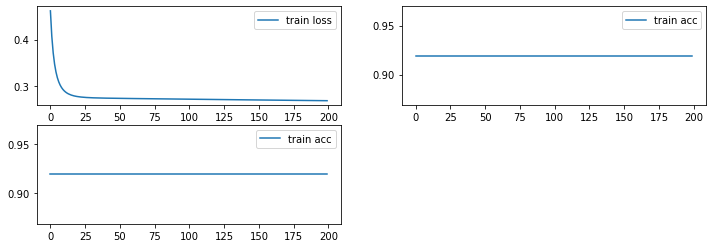

array([[0.4611857 , 0.91916077],
       [0.40701042, 0.91916077],
       [0.3716828 , 0.91916077],
       [0.34772212, 0.91916077],
       [0.33090571, 0.91916077],
       [0.31875811, 0.91916077],
       [0.30976858, 0.91916077],
       [0.30297976, 0.91916077],
       [0.2977641 , 0.91916077],
       [0.29369787, 0.91916077],
       [0.29048742, 0.91916077],
       [0.28792456, 0.91916077],
       [0.28585872, 0.91916077],
       [0.28417907, 0.91916077],
       [0.28280279, 0.91916077],
       [0.28166709, 0.91916077],
       [0.28072381, 0.91916077],
       [0.2799356 , 0.91916077],
       [0.2792732 , 0.91916077],
       [0.27871351, 0.91916077],
       [0.27823809, 0.91916077],
       [0.2778322 , 0.91916077],
       [0.2774839 , 0.91916077],
       [0.2771835 , 0.91916077],
       [0.2769231 , 0.91916077],
       [0.2766962 , 0.91916077],
       [0.27649746, 0.91916077],
       [0.27632243, 0.91916077],
       [0.27616745, 0.91916077],
       [0.27602944, 0.91916077],
       [0.

In [26]:
deep_neural_network(X_train, y_train, X_test, y_test, hidden_layers = [16, 16, 16], learning_rate = 0.1, n_iter = 200)

In [54]:
X_test

array([[0.        , 0.        , 0.        , ..., 0.25      , 0.125     ,
        0.09375   ],
       [0.        , 0.        , 0.        , ..., 0.25      , 0.        ,
        0.03125   ],
       [1.        , 0.        , 0.        , ..., 0.1       , 0.0234375 ,
        0.125     ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.33333333, 0.0625    ,
        0.03125   ],
       [1.        , 0.        , 0.        , ..., 0.25      , 0.09375   ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.04166667, 0.09375   ,
        0.0078125 ]])

In [62]:
len(y_test)

1

In [43]:
y_train.shape

(1, 247083)

---------